# Lab 1: Identification of Damping Using Log Decrement


In [1]:
clear all
close all
clc
imatlab_export_fig('print-png')

## Beam Properties


In [2]:
l=21.75*0.0254;% length in meters
h=0.5*0.0254;% height in meters
w=1*0.0254;% width in meters
rho=2700;% density in kg/cubicmeter
E=7.31e10;% youngs modulus in Pa
I = (1/12)*w*h^3; % moment of inertia (m^4)
k = (3*E*I)/l^3; % stiffness (N/m)
V = l*w*h;% volume (m^3)
m = rho*V;% mass (kg)
wn = sqrt(k/m) % analytical natural frequency of massless beam with concentrated mass
wn2=(1.875)^(2)*sqrt((E*I)/(m*(l)^3)) % natural freqency of a uniform section beam
%c_cr = 2*sqrt(k*m); % critical damping coefficient


wn =

  108.2591


wn2 =

  219.7387



## Acceleration vs Time plot


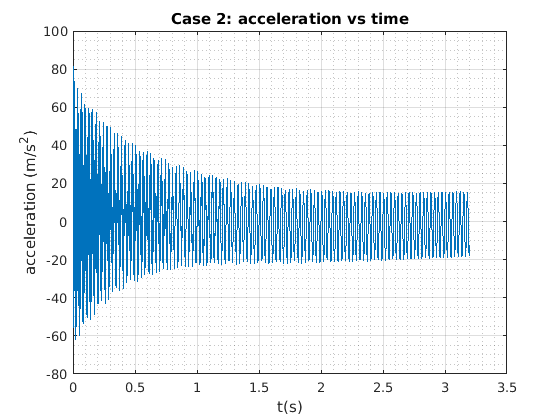

In [3]:
load('Case1-2.mat')
% Adjust data to, on average, center around 0g's, then convert to m/s^2 
Time_chan_2 = Time_chan_2*(9.81);
mean=sum(Time_chan_2)/length(Time_chan_2);
Accel = Time_chan_2-mean;
%plot acceleration data
figure
plot(Time_domain, Accel)
grid on
grid minor
title('Case 2: acceleration vs time')
xlabel('t(s)')
ylabel('acceleration (m/s^2)')

## Data Analysis


In [4]:
% Enter values from plots for calculations. Use data cursor to
% obtain x and t values.
x1 = 81.45;
t1 = 0.007031;
x2 = 15.44;
t2 = 3.181;
n = 106;
time = t2-t1;

## Log Decrement Method


In [5]:
d = (1/n)*log(x1/x2) % delta


d =

    0.0157



In [6]:
z= d/sqrt(4*pi^2+d^2) % zeta


z =

    0.0025



In [7]:
Td = (time/n)%damped time period


Td =

    0.0299



In [8]:
wd = 2*pi/Td % damped natural frequency


wd =

  209.8375



In [9]:
wne = wd/sqrt(1-z^2) % natural frequency in rad/sec


wne =

  209.8381



In [10]:
k2=(wne^2)*m % one way to use experimental zeta and nat freq to calculate C


k2 =

   2.1187e+04



In [11]:
c_cr = 2*sqrt(k2*m); % critical 

In [12]:
c=c_cr*z % damping constant


c =

    0.5042



## Using Vibration toolbox for comparison


The natural frequency is 210 rad/s.
The damping ratio is 0.0025.
The damped natural frequency is 210.
A= 0.00189
phi= 2.41
Current plot held


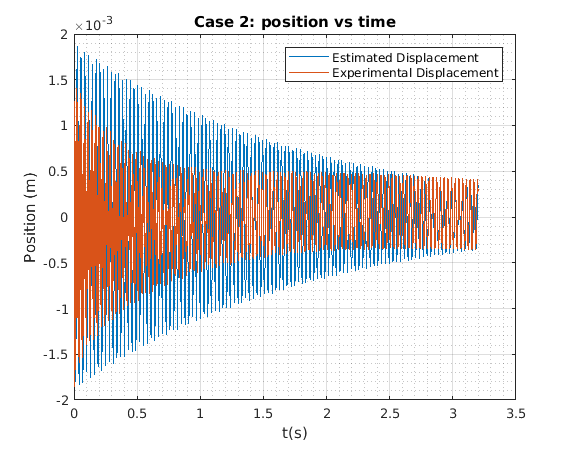

In [13]:
x = Accel./-(wd^2);
ax=max(x); % max amplitude
initialvel=-ax*wne;
vtb1_1(m,c,k2,x(1),-ax*wne,3.2)
hold
plot(Time_domain, x)
grid on
grid minor
title('Case 2: position vs time')
xlabel('t(s)')
ylabel('Position (m)')
legend('Estimated Displacement','Experimental Displacement')

## 3 Mode shapes


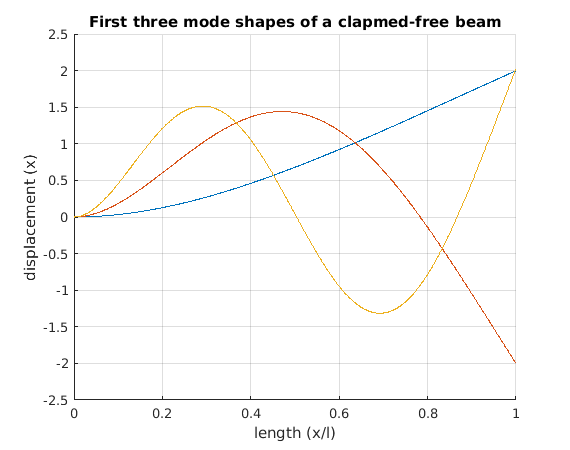

In [14]:
% Plot first 3 mode shapes
beta_1 = 1.87510407;
beta_2 = 4.69409113;
beta_3 = 7.85475744;
sigma_1 = 0.7341;
sigma_2 = 1.0185;
sigma_3 = 0.9992;
close all
figure
hold on
x = [0:1/1000:1];
Xn_1 = cosh(beta_1.*x)-cos(beta_1.*x)-sigma_1.*(sinh(beta_1.*x)-sin(beta_1.*x));
Xn_2 = cosh(beta_2.*x)-cos(beta_2.*x)-sigma_2.*(sinh(beta_2.*x)-sin(beta_2.*x));
Xn_3 = cosh(beta_3.*x)-cos(beta_3.*x)-sigma_3.*(sinh(beta_3.*x)-sin(beta_3.*x));
plot(x,Xn_1)
plot(x,Xn_2)
plot(x,Xn_3)
title('First three mode shapes of a clapmed-free beam')
xlabel('length (x/l)')
ylabel('displacement (x)')
grid on
hold off